<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21619" size=6px>                   
                    <b>  💰 "SmartPremium: Predicting Insurance Costs with Machine Learning"
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4.5px>                   
                    <b>  
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=2px>                                      
                    <b> 
                    <br>    
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4px>                   
                    <b>  Regression ML Modeling | ML Pipeline | ML Flow Integration | Streamlit Web app
                    </b>
                </font>
            </div>
         </td>
    </tr>
</table>

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Author 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* R Jegadeswari


<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Problem Statement  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Problem Statement:**
Insurance companies use various factors such as age, income, health status, and claim history to estimate premiums for customers. The goal of this project is to build a machine learning model that accurately predicts insurance premiums based on customer characteristics and policy details.

**Business Usecases:**
* 💰 Insurance Companies: Optimize premium pricing based on risk factors
* 📊 Financial Institutions: Assess risk for loan approvals tied to insurance policies
* 🧑‍⚕️ Healthcare Providers: Estimate future healthcare costs for patients
* 🔍 Customer Service Optimization: Provide real-time insurance quotes based on data-driven predictions

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Objective  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

The objective is to provide real time insurance premium estimates based on various customer characteristics and policy details.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Regression Models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* **Linear Regression**
* **Decision Tree Regressor**
* **Random Forest Regressor**
* **XGBoost Regressor**

###

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>  Import Libraries
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
import pandas as pd
import numpy as np
import logging

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

###

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>  Data Preprocessing
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
class DataProcessor:
    def __init__(self, train_filepath='data/train.csv', test_filepath='data/test.csv'):
        self.train_filepath = train_filepath
        self.test_filepath = test_filepath
        self.train_df = None
        self.test_df = None
        self.test_ids = None

        self.preprocessor = None
        self.X_train = None
        self.y_train = None
        self.target_variable = 'Premium Amount'

        self.numerical_features = []
        self.categorical_features = []
        self.text_features = []
        self.date_features = []

    def load_data(self):
        logging.info(f"Loading training data from {self.train_filepath}")
        logging.info(f"Loading test data from {self.test_filepath}")
        try:
            self.train_df = pd.read_csv(self.train_filepath)
            self.test_df = pd.read_csv(self.test_filepath)
            logging.info("Data loaded successfully.")

            if 'id' in self.test_df.columns:
                self.test_ids = self.test_df.pop('id')
            return self.train_df, self.test_df
        except FileNotFoundError as fnf_err:
            logging.error(f"File not found: {fnf_err}")
        except Exception as e:
            logging.error(f"Unexpected error: {e}")
        return None, None

    def initial_eda(self):
        if self.train_df is None:
            logging.warning("Train data not loaded. Skipping EDA.")
            return

        logging.info("--- Initial EDA ---")
        logging.info(f"Shape: {self.train_df.shape}")
        logging.info(self.train_df.head())
        logging.info("Missing values:\n%s", self.train_df.isnull().sum())

        self.numerical_features = self.train_df.select_dtypes(include=np.number).columns.tolist()
        self.categorical_features = self.train_df.select_dtypes(include='object').columns.tolist()

        # Clean up specific columns
        for feature, dest in [('Customer Feedback', self.text_features),
                              ('Policy Start Date', self.date_features)]:
            if feature in self.categorical_features:
                dest.append(feature)
                self.categorical_features.remove(feature)

        if self.target_variable in self.numerical_features:
            self.numerical_features.remove(self.target_variable)
            
        if 'id' in self.numerical_features:
            self.numerical_features.remove('id')

        logging.info(f"Numerical: {self.numerical_features}")
        logging.info(f"Categorical: {self.categorical_features}")
        logging.info(f"Text (ignored): {self.text_features}")
        logging.info(f"Date (ignored): {self.date_features}")

    def visualize_distributions(self, max_categories=5):
        if self.train_df is None:
            logging.warning("Train data not loaded. Cannot visualize.")
            return

        self.train_df[self.numerical_features + [self.target_variable]].hist(bins=30, figsize=(15, 10))
        plt.suptitle('Numerical Feature Distributions')
        plt.tight_layout()
        plt.show()

        for col in self.categorical_features[:max_categories]:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=col, y=self.target_variable, data=self.train_df)
            plt.xticks(rotation=45)
            plt.title(f'{self.target_variable} by {col}')
            plt.tight_layout()
            plt.show()

        plt.figure(figsize=(10, 8))
        sns.heatmap(self.train_df[self.numerical_features + [self.target_variable]].corr(), annot=True, fmt='.2f')
        plt.title('Correlation Heatmap')
        plt.show()

    def preprocess_data(self):
        if self.train_df is None or self.test_df is None:
            logging.warning("Data not loaded. Cannot preprocess.")
            return

        drop_cols = ['Policy Start Date', 'Customer Feedback', 'id']
        self.train_df.drop(columns=[col for col in drop_cols if col in self.train_df], inplace=True, errors='ignore')
        self.test_df.drop(columns=[col for col in drop_cols if col in self.test_df], inplace=True, errors='ignore')

        self.numerical_features = self.train_df.select_dtypes(include=np.number).columns.drop(self.target_variable).tolist()
        self.categorical_features = self.train_df.select_dtypes(include='object').columns.tolist()
        
        # Detect skewed features
        skewness = self.train_df[self.numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)
        self.skewed_features = skewness[abs(skewness) > 0.75].index.tolist()
        logging.info(f"Skewed features to transform: {self.skewed_features}")

        # Apply Yeo-Johnson transformation to reduce skewness
        pt = PowerTransformer(method='yeo-johnson')
        self.train_df[self.skewed_features] = pt.fit_transform(self.train_df[self.skewed_features])
        self.test_df[self.skewed_features] = pt.transform(self.test_df[self.skewed_features])
            
        plt.suptitle('Numerical Feature Distributions - W/O Skewness')
        self.train_df[self.skewed_features].hist(bins=30, figsize=(15, 10))
        self.test_df[self.skewed_features].hist(bins=30, figsize=(15, 10))
        plt.tight_layout()
        plt.show()   
            
        num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

        cat_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        self.preprocessor = ColumnTransformer([
            ('num', num_pipeline, self.numerical_features),
            ('cat', cat_pipeline, self.categorical_features)
        ])

        self.X_train = self.train_df.drop(columns=[self.target_variable])
        self.y_train = self.train_df[self.target_variable]

        logging.info("Preprocessing complete.")

    def get_processed_data_for_training(self):
        if self.preprocessor is None or self.X_train is None or self.y_train is None:
            logging.error("Training data not ready. Did you run preprocess_data()?")
            return None, None, None
        return self.preprocessor, self.X_train, self.y_train

    def get_test_data_for_prediction(self):
        if self.test_df is None:
            logging.error("Test data unavailable.")
            return None, None
        return self.test_df, self.test_ids

INFO: Loading training data from data/train.csv
INFO: Loading test data from data/test.csv
INFO: Data loaded successfully.
INFO: --- Initial EDA ---
INFO: Shape: (1200000, 21)
INFO:    id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938

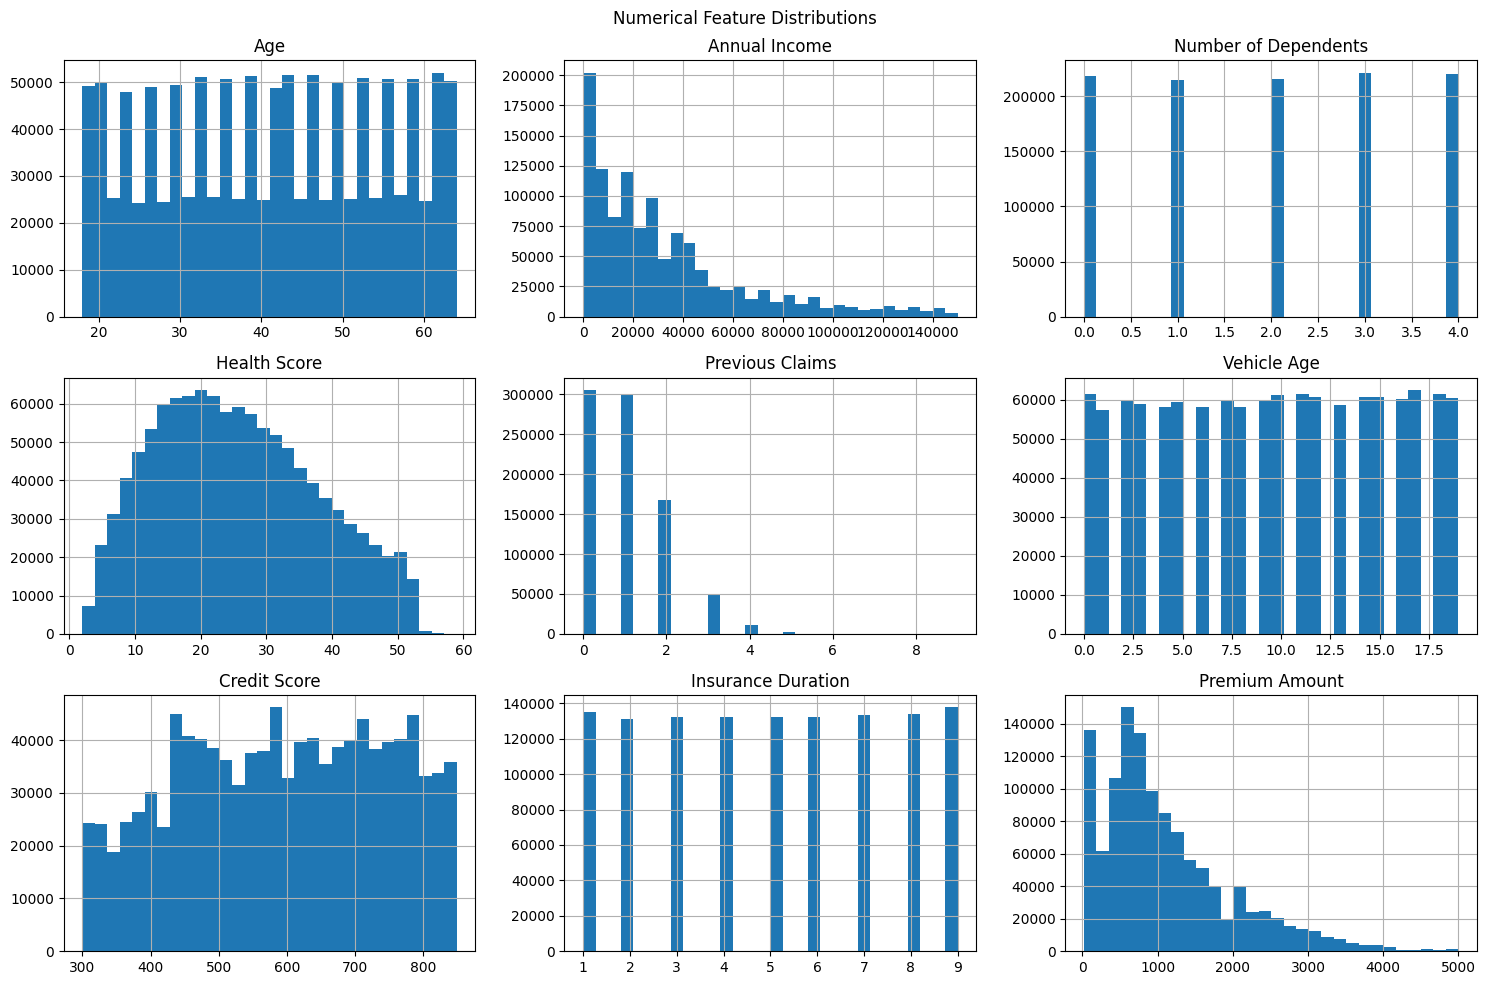

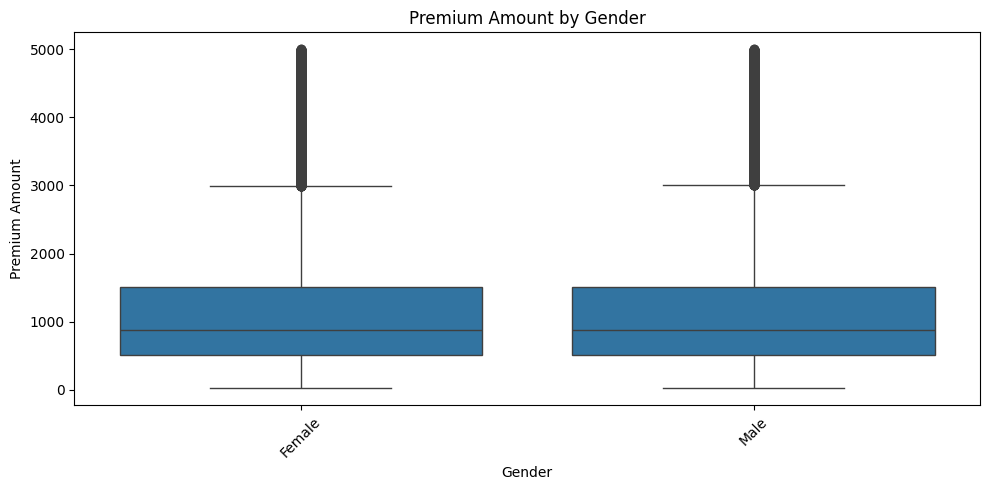

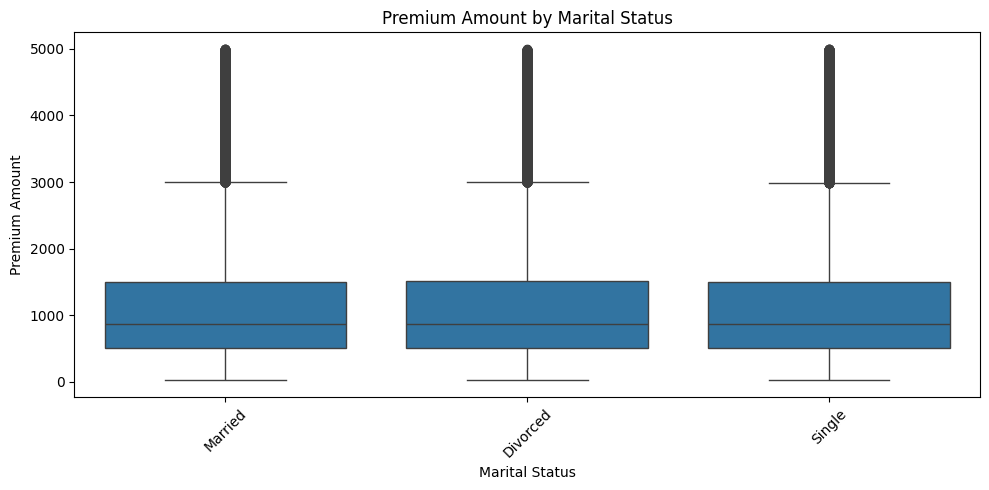

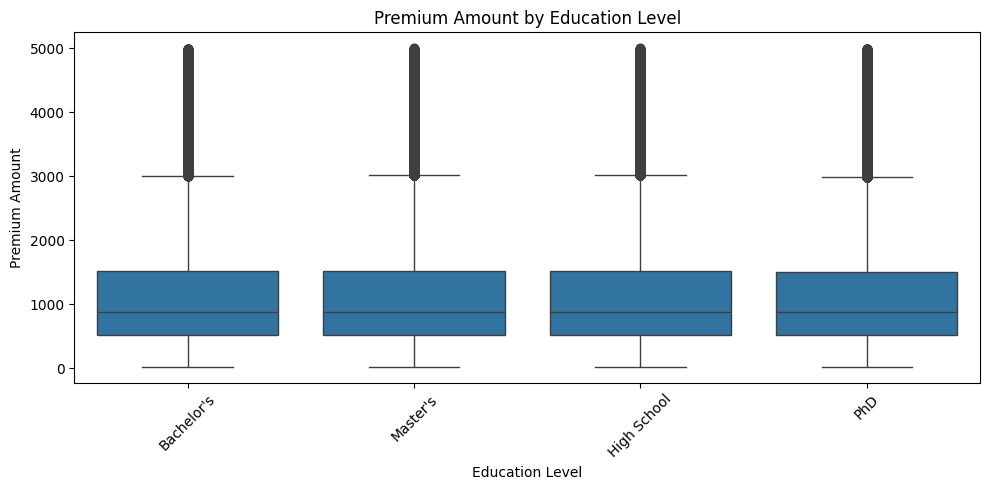

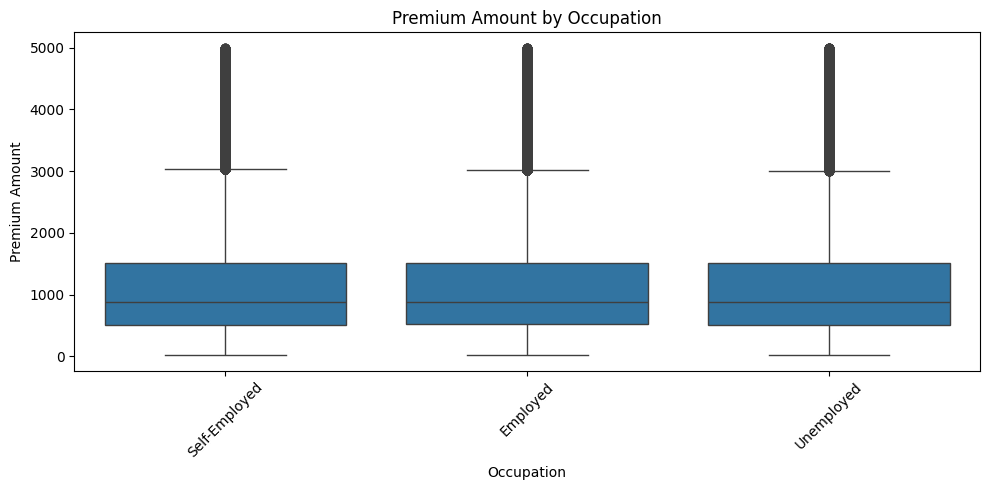

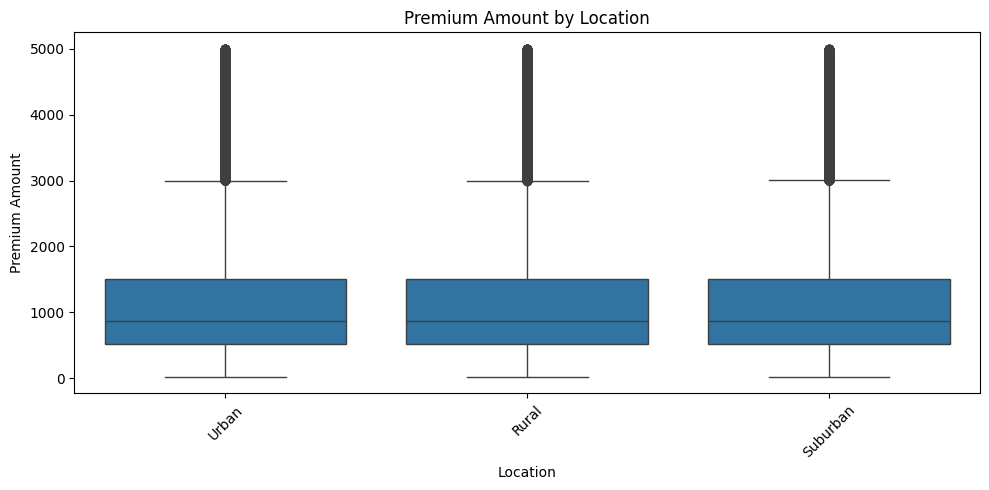

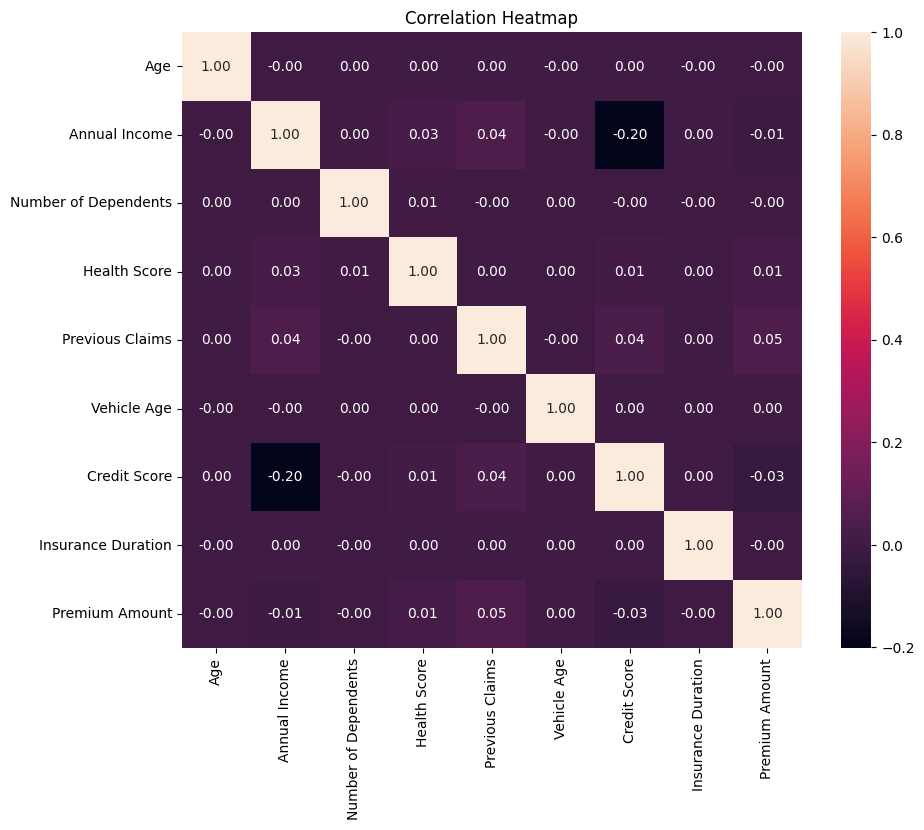

INFO: Skewed features to transform: ['Annual Income', 'Previous Claims']


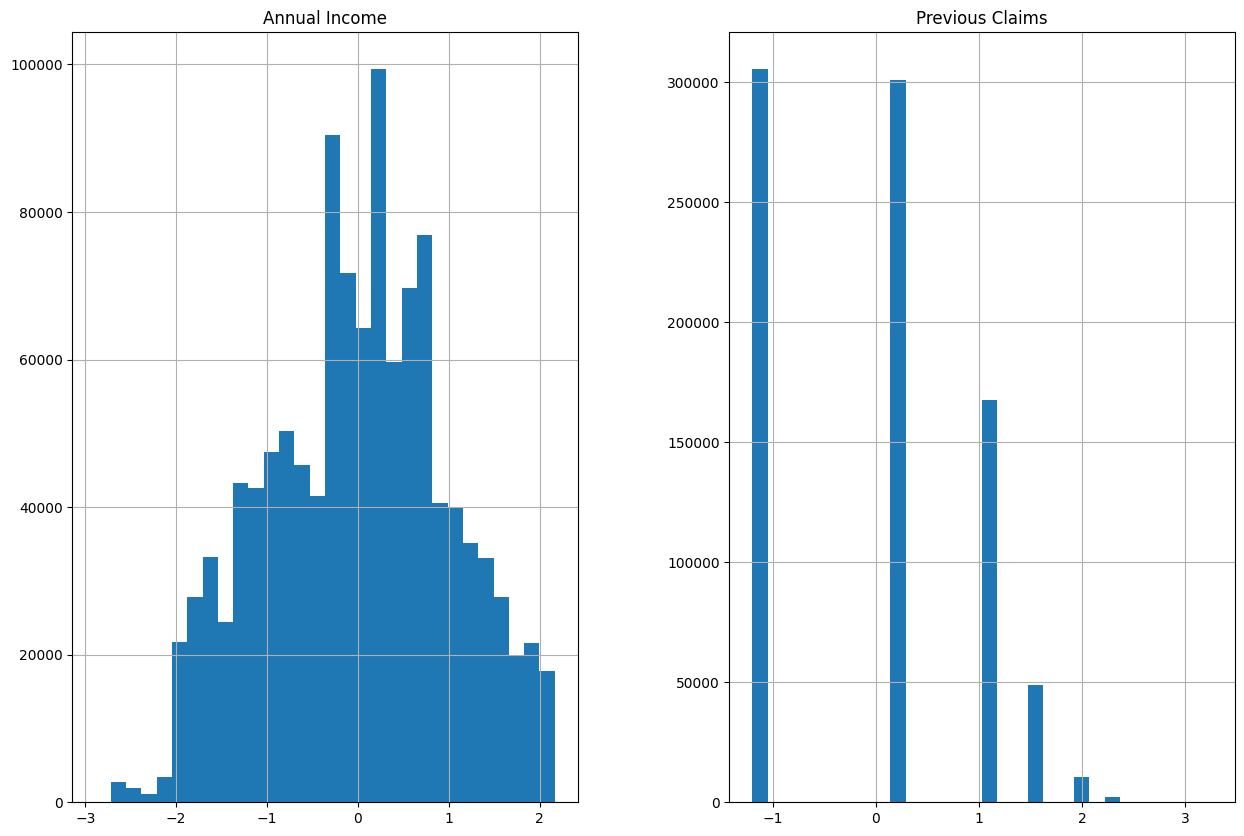

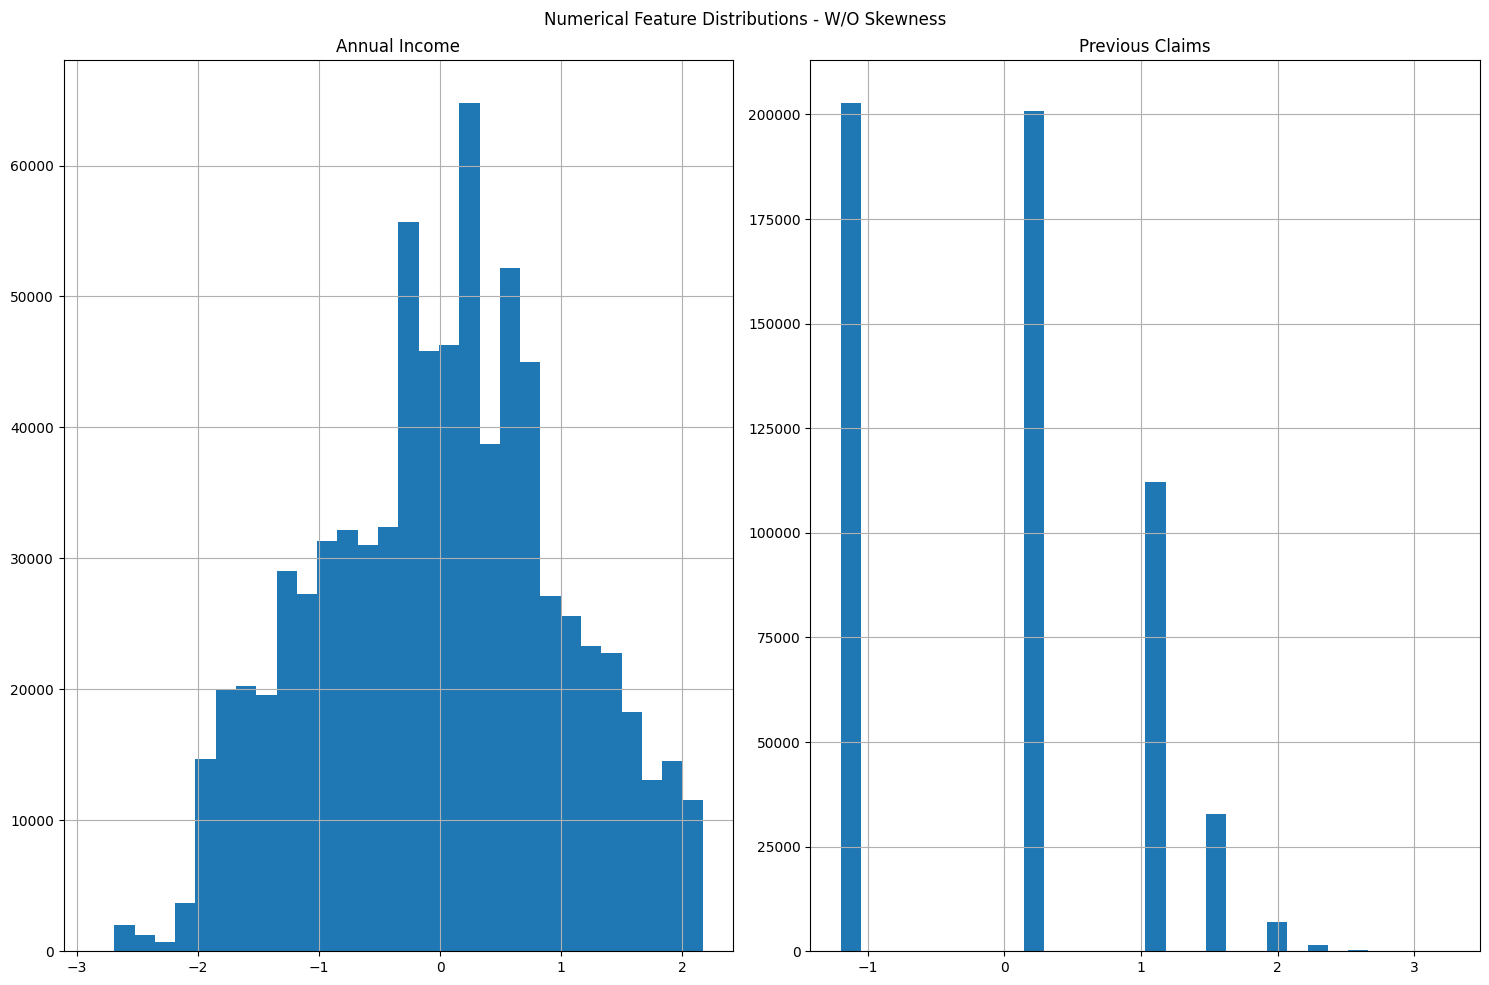

INFO: Preprocessing complete.
INFO: Train features shape: (1200000, 17)
INFO: Test features shape: (800000, 17)


In [4]:
if __name__ == "__main__":
    processor = DataProcessor()

    train_df, test_df = processor.load_data()
    if train_df is not None and test_df is not None:
        processor.initial_eda()
        processor.visualize_distributions()
        processor.preprocess_data()

        preprocessor, X_train, y_train = processor.get_processed_data_for_training()
        X_test_raw, test_ids = processor.get_test_data_for_prediction()

        if preprocessor:
            logging.info(f"Train features shape: {X_train.shape}")
            logging.info(f"Test features shape: {X_test_raw.shape}")